In [1]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
telco_df = wrangle.wrangle_telco()
telco_df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [3]:
telco_df.shape

(1695, 4)

In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [5]:
train, validate, test = wrangle.telco_split_continuous(telco_df)

In [6]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

In [7]:
train = train.set_index("customer_id")
validate = validate.set_index("customer_id")
test = test.set_index("customer_id")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 3508-VLHCZ to 8380-MQINP
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  949 non-null    float64
 1   tenure           949 non-null    int64  
 2   total_charges    949 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 29.7+ KB


In [9]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3508-VLHCZ,90.55,71,6239.05
9337-SRRNI,25.30,66,1673.80
9715-WZCLW,97.20,71,6910.30
9975-GPKZU,19.75,46,856.50
9430-NKQLY,25.10,72,1790.80


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [11]:
# Define the thing
# scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
# scaler.fit(train[['monthly_charges']])

# #transform
# scaled = scaler.transform(train[['monthly_charges']])

# single step to fit and transform
#scaled = scaler.fit_transform(train[['monthly_charges']])

Text(0.5, 1.0, 'Scaled')

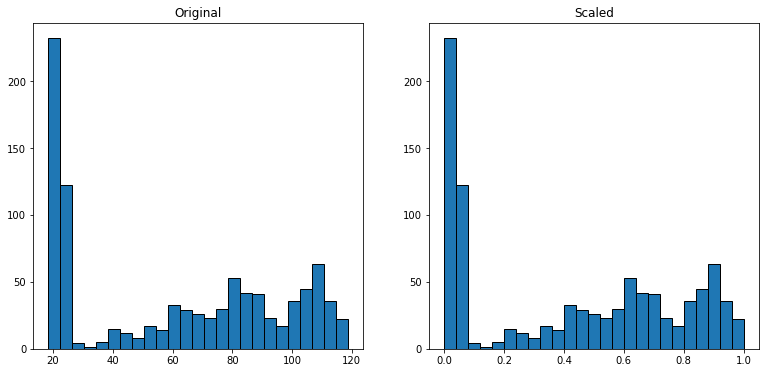

In [15]:
scaler = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

# FIT
scaler.fit(train[['monthly_charges']])

# TRANSFORM
scaled = scaler.transform(train[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled')

In [19]:
# RUN SCALED,  this will give you a long array of the scaled data
# scaled

In [20]:
# you can make a new 'scaled' column in original dataframe if you wish
train['monthly_charges_scaled'] = scaled

In [21]:
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled
customer_id,,,,
3508-VLHCZ,90.55,71,6239.05,0.718984
9337-SRRNI,25.30,66,1673.80,0.068759
9715-WZCLW,97.20,71,6910.30,0.785252
9975-GPKZU,19.75,46,856.50,0.013453
9430-NKQLY,25.10,72,1790.80,0.066766


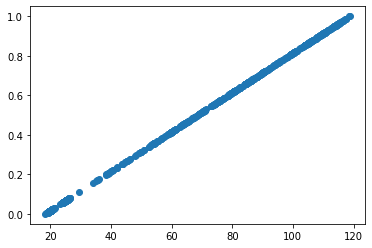

In [22]:
plt.scatter(train.monthly_charges, scaled)

(array([357.,   7.,  29.,  37.,  72.,  69., 110.,  66., 100., 102.]),
 array([ 18.4  ,  28.435,  38.47 ,  48.505,  58.54 ,  68.575,  78.61 ,
         88.645,  98.68 , 108.715, 118.75 ]),
 <BarContainer object of 10 artists>)

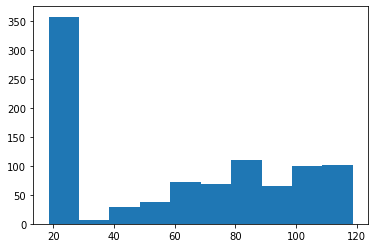

In [23]:
plt.hist(train.monthly_charges)

(array([357.,   7.,  29.,  37.,  72.,  69., 110.,  66., 100., 102.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

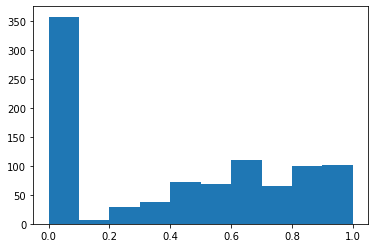

In [24]:
plt.hist(scaled)

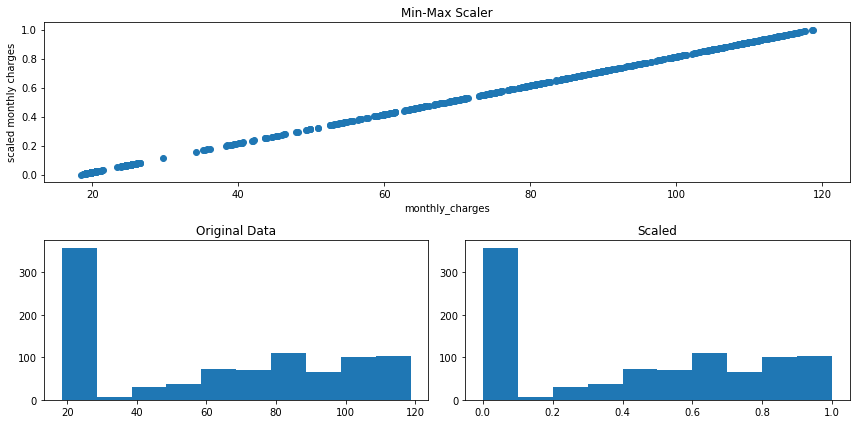

In [26]:
#show all together
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'scaled monthly charges', title= 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original Data')

ax3.hist(scaled)
ax3.set(title='Scaled')
plt.tight_layout()

In [27]:
def visualize_scaled_data(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

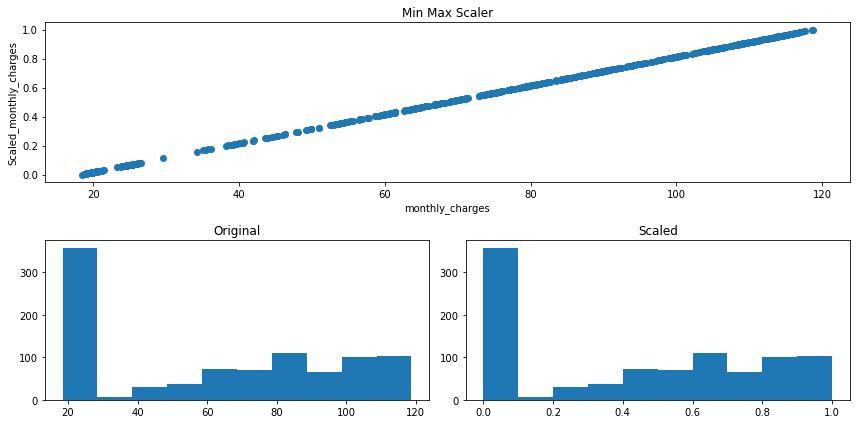

In [29]:
visualize_scaled_data(MinMaxScaler(), 'Min Max Scaler', 'monthly_charges')

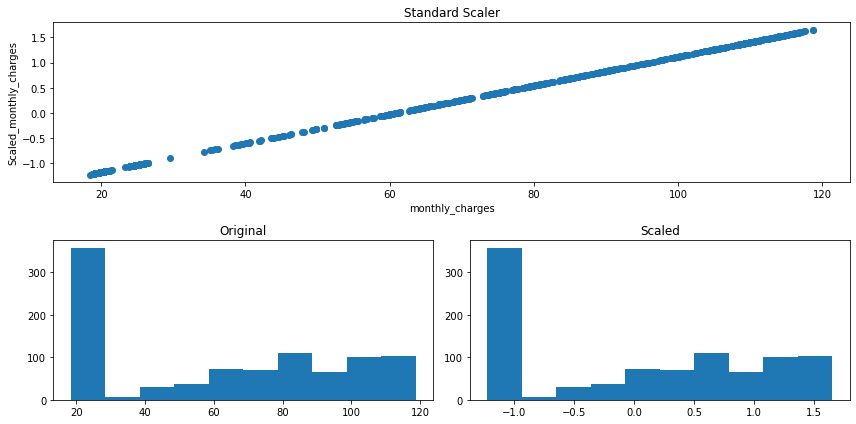

In [30]:
visualize_scaled_data(StandardScaler(), 'Standard Scaler', 'monthly_charges')

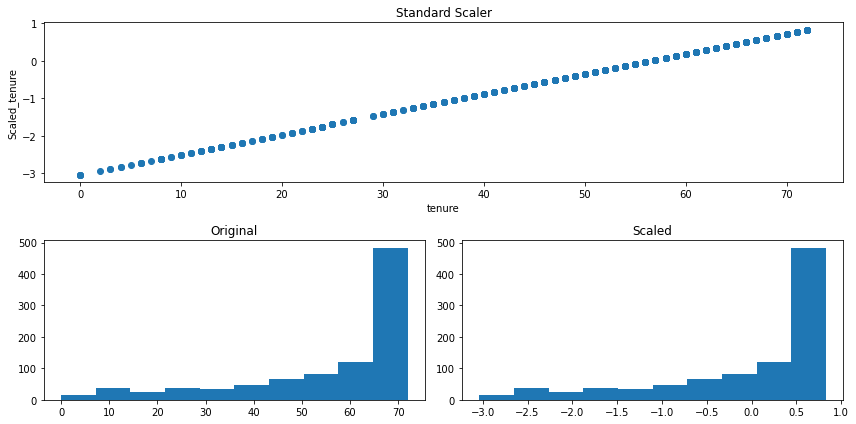

In [31]:
visualize_scaled_data(StandardScaler(), 'Standard Scaler', 'tenure')

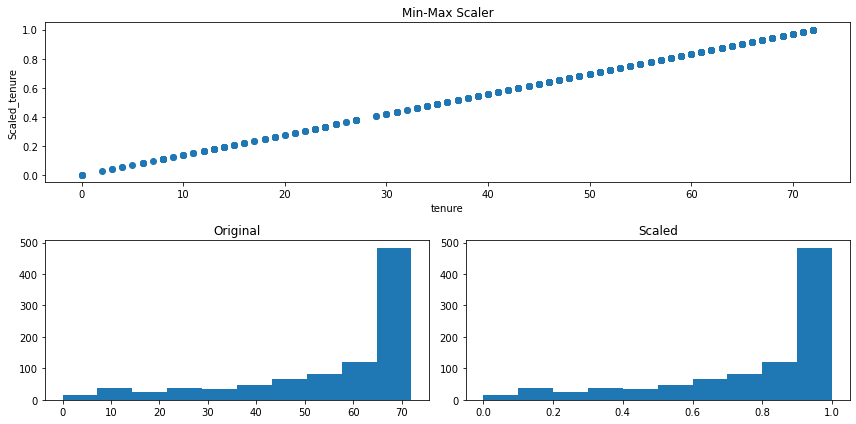

In [32]:
visualize_scaled_data(MinMaxScaler(), 'Min-Max Scaler', 'tenure')

2.  Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [33]:
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled
customer_id,,,,
3508-VLHCZ,90.55,71,6239.05,0.718984
9337-SRRNI,25.30,66,1673.80,0.068759
9715-WZCLW,97.20,71,6910.30,0.785252
9975-GPKZU,19.75,46,856.50,0.013453
9430-NKQLY,25.10,72,1790.80,0.066766


In [34]:
scaler = MinMaxScaler()

In [35]:
scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.71898356, 0.98611111],
       [0.06875934, 0.91666667],
       [0.78525162, 0.98611111],
       ...,
       [0.96860987, 1.        ],
       [0.5675137 , 0.84722222],
       [0.01893373, 0.76388889]])

In [36]:
scaled_df = pd.DataFrame(scaled, index=train.index, columns = ['monthly_charges', 'tenure'])

In [37]:
scaled_df.head()

,monthly_charges,tenure
customer_id,,
3508-VLHCZ,0.718984,0.986111
9337-SRRNI,0.068759,0.916667
9715-WZCLW,0.785252,0.986111
9975-GPKZU,0.013453,0.638889
9430-NKQLY,0.066766,1.000000


In [38]:
scaler.inverse_transform(scaled_df)

array([[ 90.55,  71.  ],
       [ 25.3 ,  66.  ],
       [ 97.2 ,  71.  ],
       ...,
       [115.6 ,  72.  ],
       [ 75.35,  61.  ],
       [ 20.3 ,  55.  ]])

3.  Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [47]:
# Create the object
quantile = QuantileTransformer(output_distribution = 'normal')

In [48]:
# Fit and transform it
data_trans = quantile.fit_transform(train[['monthly_charges']])

Text(0.5, 1.0, 'Quantile Transformed')

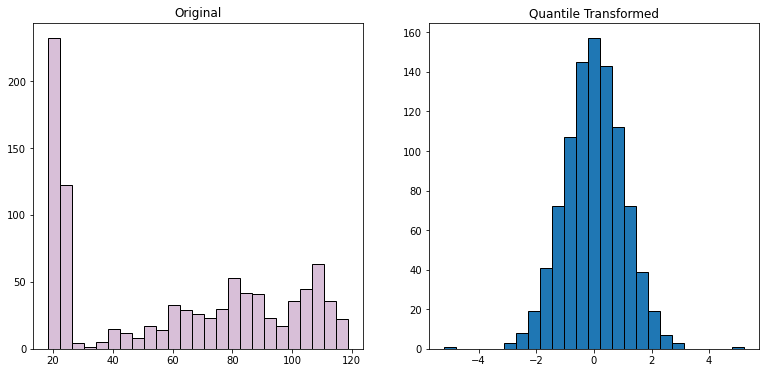

In [51]:
#visualize it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['monthly_charges']], bins=25, color='thistle', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_trans , bins=25, ec='black')
plt.title('Quantile Transformed')

4.  Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

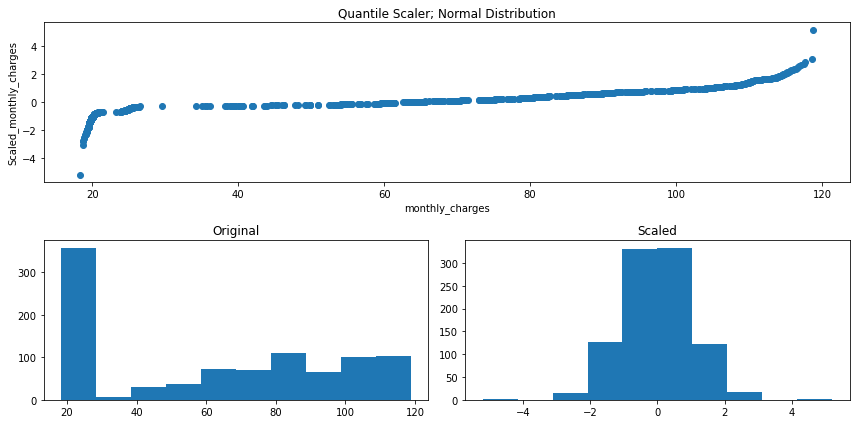

In [39]:
visualize_scaled_data(QuantileTransformer(output_distribution='normal'), 'Quantile Scaler; Normal Distribution', 'monthly_charges')

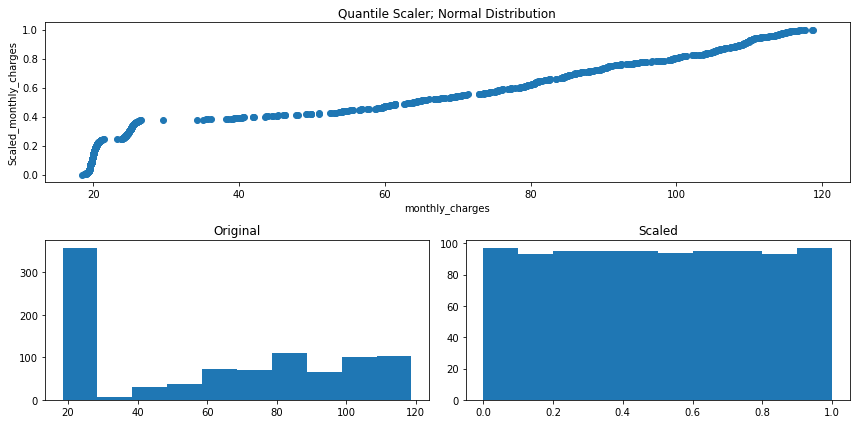

In [40]:
visualize_scaled_data(QuantileTransformer(), 'Quantile Scaler; Normal Distribution', 'monthly_charges')

5.  Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [44]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [45]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = validate[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [46]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure
customer_id,,
3508-VLHCZ,0.718984,0.986111
9337-SRRNI,0.068759,0.916667
9715-WZCLW,0.785252,0.986111
9975-GPKZU,0.013453,0.638889
9430-NKQLY,0.066766,1.000000
